In [20]:
import sqlite3
import pandas as pd
import numpy as np
import xgboost as xgb 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from IPython.display import display
%matplotlib inline

In [23]:
# Soccer database from https://www.kaggle.com/hugomathien/soccer
cnx = sqlite3.connect('C:/Users/LENOVO/Downloads/database.sqlite')
# Create your connection.
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


# Method 1 - Lets build model by removing all the null values

In [64]:
#dropp null values
df.dropna(inplace=True)

In [68]:
#Pick the independent variables from the Dataset
df_features=df[df.columns[5:]]

#check for the shape of the independent variables - 42 cols became 37 and nulls removed
df_features.shape

(180354, 63)

In [69]:
#check to see if nulls exist
df_features.isnull().values.sum()

0

In [70]:
#remove the three non numeric cols. Cols reduced from 37 to 34
df_features.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1,inplace=True)
df_features.shape

F:\Data Science\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(180354, 60)

In [71]:
#check for null values again
df_features.isnull().values.sum()

0

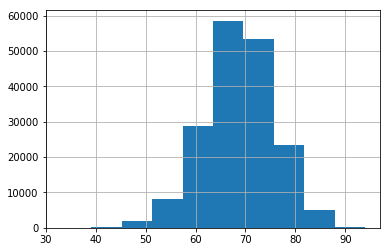

In [72]:
#create a list of dependent column, which is the player ranking
df_target=df[df.columns[4]]
df_target.hist()

In [73]:
df_target.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [74]:
df_target.describe()

count    180354.000000
mean         68.635317
std           7.027950
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [75]:
#check for null values in the dependent variable
df_target.isnull().values.sum()

0

In [76]:
#split the dataset into training and test
X_Train,X_Test,y_Train,y_Test = train_test_split(df_features,df_target,test_size=0.3)

In [77]:
#Build the LInear Regression model using the training dataset
linReg=LinearRegression()
linReg.fit(X_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
#print the slope and the intercept
print(linReg.coef_)
print(linReg.intercept_)

[ 3.74644837e-01  2.34859810e-02  1.21731185e-02  6.88675264e-02
  4.99344529e-02  3.94170902e-03 -1.21251386e-02  1.30978431e-02
  1.23968733e-02  7.07689326e-03  1.35114294e-01  7.24864564e-03
  1.02382693e-02 -8.53513239e-03  2.05966399e-01  7.19529383e-03
  1.66870284e-02  1.52541158e-02 -2.49306963e-03  5.93176986e-02
 -1.47781691e-02  1.99583644e-02  1.17054730e-02 -9.94917615e-03
 -1.37289501e-03  1.37134819e-02  3.20533815e-02  5.39550844e-03
 -2.81371715e-02  1.65960943e-01  3.45796195e-02 -3.55512621e-02
  6.06472292e-02  2.49706857e-02  3.31658327e-01 -6.96251872e-01
  1.56882876e+00  2.32941231e-01  8.35051953e-02 -6.07508895e-01
  5.77460303e-02  6.53795897e-01 -4.83071162e-01  3.35438413e-01
 -4.43430635e-01 -3.86087238e-01  4.03452394e-02  6.77558751e-01
  6.81855315e-01  5.73589789e-01 -2.22044605e-16 -6.96251872e-01
  5.77460303e-02  4.67904227e-02  4.39746516e-01 -2.37135931e-01
  4.93080086e-02  8.35051953e-02 -6.07508895e-01  2.30285756e-02]
-3.656277096848541


In [79]:
#predict the test data using the Test dataset
print(linReg.predict(X_Test))

[67.40880555 69.69092037 70.65178153 ... 67.68409336 69.64350679
 60.77039029]


In [81]:
#Check for the accuracy score
linReg.score(X_Test,y_Test)

0.843688616821921

# Build a DecisionTree model

In [82]:
decTree=DecisionTreeRegressor()
decTree.fit(X_Train,y_Train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [83]:
#Predict the Test data
decTree.predict(X_Test)

array([68.        , 70.66666667, 72.        , ..., 70.        ,
       62.        , 53.        ])

In [84]:
#Check for the score
decTree.score(X_Test,y_Test)

0.9602360792518913

# Method 2 - Now Replacing NaNs with Mean Value & then building a model

In [87]:
#get the data from the csv file
dfM = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [88]:
#Pick the independent variables and remove unwanted columns
df_Mfeatures=dfM[dfM.columns[5:]]
df_Mfeatures.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1,inplace=True)
df_Mfeatures.shape

F:\Data Science\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(183978, 34)

In [89]:
#build the dependent variable
df_Mtarget=dfM[dfM.columns[4]]

In [90]:
#Replace the NaNs with the mean value of the respective columns & check for null values
df_Mfeatures.apply(lambda x:x.fillna(x.mean(),axis=0,inplace=True))
df_Mfeatures.isnull().values.sum()

0

In [91]:
#fill mean values inplace of NaNs for the Dependent variable
df_Mtarget.fillna(df_Mtarget.mean(),inplace=True)
df_Mtarget.isnull().values.sum()

0

In [92]:
#prepare Train and Test set
X_Train,X_Test,y_Train,y_Test = train_test_split(df_Mfeatures,df_Mtarget,test_size=0.3)

In [93]:
#Build the Linear Regression model 
linReg=LinearRegression()
linReg.fit(X_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
#print the Slope and Intercept values
print(linReg.coef_)
print(linReg.intercept_)

[ 0.37916815  0.02082705  0.01070721  0.07021922  0.0518572   0.00364852
 -0.01260014  0.01153454  0.01349163  0.00609806  0.13695584  0.00720137
  0.00894883 -0.00890053  0.20727197  0.00741922  0.0168199   0.01597223
 -0.0046269   0.06049101 -0.01292104  0.0203143   0.01320601 -0.00957383
 -0.00340632  0.01466758  0.03097423  0.004535   -0.02900407  0.16708083
  0.03325775 -0.03338455  0.05501305  0.02253395]
-3.6525923443052903


In [95]:
#Print the predicted values
print(linReg.predict(X_Test))

[72.37045657 68.17836898 68.36416217 ... 75.42444599 62.20072884
 59.18418087]


In [96]:
#find the score
linReg.score(X_Test,y_Test)

0.8393908964443088

# Repeat the test for DecisionTree model

In [97]:
decTree=DecisionTreeRegressor()
decTree.fit(X_Train,y_Train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [98]:
decTree.predict(X_Test)

array([73., 64., 68., ..., 71., 61., 61.])

In [99]:
decTree.score(X_Test,y_Test)

0.9586867212105346

# we could see higher percentage of prediction for DecisionTree and the values predicted and near to equal in both tests.